In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import make_blobs, make_moons
from sklearn import datasets
import copy

### Задание 1

In [57]:
class Perceptron:
    def __init__(self, lr=0.01, max_iterations=1000):
        self.lr = lr
        self.max_iterations = max_iterations
        self.W = None
    
    def fit(self, X, y):
     # Here we add the fake column to simplify calculations
        X_ = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1) # shape: [n, m_features+1]
        self.W = np.ones([X.shape[1]+1, 1]) * 0.0001 # shape: [m_features+1, 1]
        predictions = np.sign(np.dot(X_, self.W))
        iterations = 1
        while(iterations < self.max_iterations):
            not_equal_idx = np.argwhere(predictions.flatten() != y).flatten()
            update_idx = np.random.randint(0, not_equal_idx.shape[0])
            self.W = self.W + self.lr * (X_[update_idx] * y[update_idx]).reshape(self.W.shape)
            predictions = np.sign(np.dot(X_, self.W))
            iterations += 1
        return self.W
            
    def predict(self, X):
        X_ = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)
        return np.sign(np.dot(X_, self.W))

In [58]:
def separating_line_2d(x, w0, w1, w2):
    return (-w1*x - w0)/w2

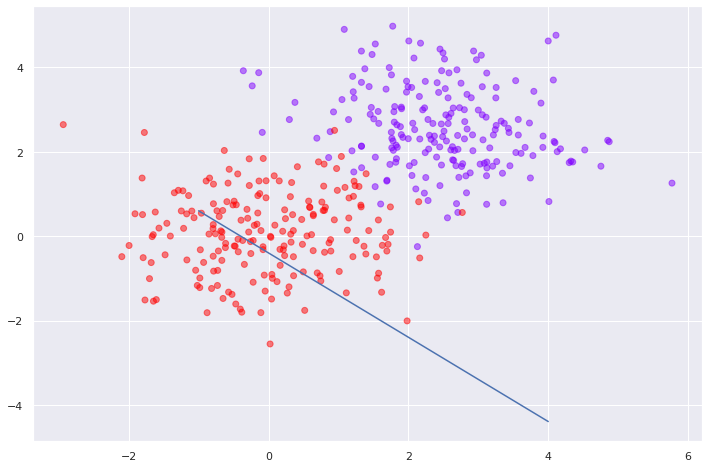

In [71]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = Perceptron()
W=c.fit(X, true_labels)
predictions=c.predict(X)
colors = [0 if yi == 0 else 1 for yi in true_labels]
w0, w1, w2 = W[0][0], W[1][0], W[2][0]
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=colors, cmap='rainbow_r', alpha=0.5)
plt.plot([-1, 4], [separating_line_2d(-1, w0, w1, w2), separating_line_2d(4, w0, w1, w2)])

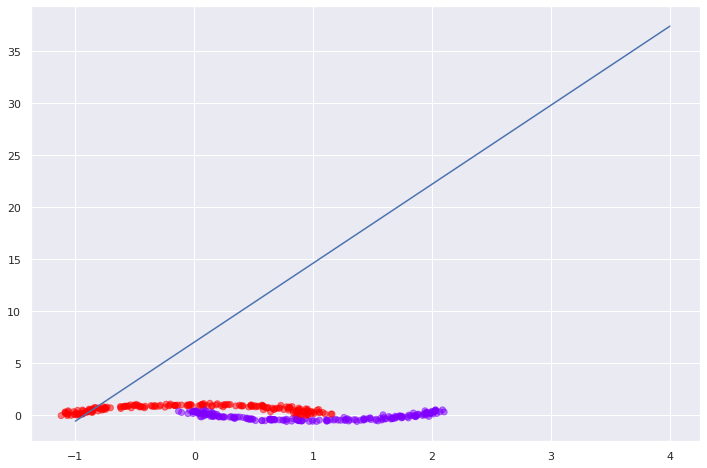

In [72]:
X, true_labels = make_moons(400, noise=0.075)
c = Perceptron()
W=c.fit(X, true_labels)
predictions=c.predict(X)
colors = [0 if yi == 0 else 1 for yi in true_labels]
w0, w1, w2 = W[0][0], W[1][0], W[2][0]
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=colors, cmap='rainbow_r', alpha=0.5)
plt.plot([-1, 4], [separating_line_2d(-1, w0, w1, w2), separating_line_2d(4, w0, w1, w2)])

### Задание 2

In [80]:
class PerceptronWithAPocket():
    def __init__(self, lr=0.01, max_iterations=1000):
        self.lr = lr
        self.max_iterations = max_iterations
        self.pocket_W = None
        self.pocket_accuracy = None
    
    def fit(self, X, y):
        # Here we add the fake column to simplify calculations
        X_ = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1) # shape: [n, m_features+1]
        W = np.ones([X.shape[1]+1, 1]) * 0.0001 # shape: [m_features+1, 1]
        predictions = np.sign(np.dot(X_, W))
        iterations = 1
        accuracy_v = []
        while(iterations < self.max_iterations):
            not_equal_idx = np.argwhere(predictions.flatten() != y).flatten()
            update_idx = np.random.randint(0, not_equal_idx.shape[0])
            W = W + self.lr * (X_[update_idx] * y[update_idx]).reshape(W.shape)
            predictions = np.sign(np.dot(X_, W))
            accuracy = accuracy_score(predictions, y)
            accuracy_v.append(accuracy)
            iterations += 1
            if not self.pocket_accuracy or accuracy > self.pocket_accuracy:
                self.pocket_accuracy = accuracy
                self.pocket_W = np.copy(W)
        return self.pocket_W, self.pocket_accuracy, accuracy_v
    
    def predict(self, X):
        X_ = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)
        return np.sign(np.dot(X_, self.pocket_W))

<Figure size 864x576 with 0 Axes>

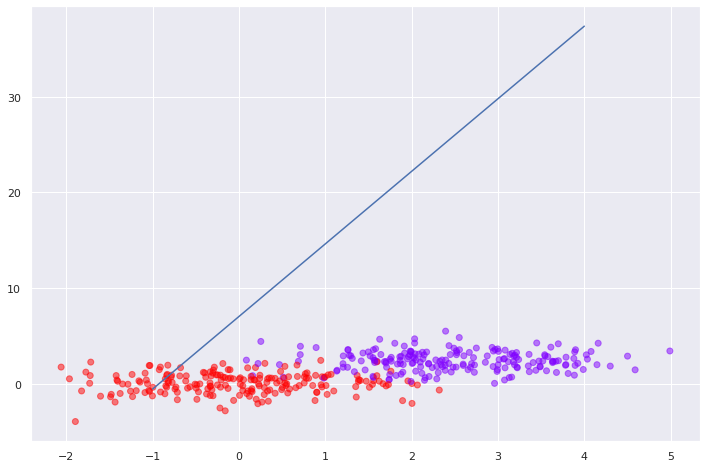

In [81]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = PerceptronWithAPocket()
pocket_W, pocket_accuracy, accuracy_v = c.fit(X, true_labels)
plt.figure(figsize=(12, 8))
predictions=c.predict(X)
colors = [0 if yi == 0 else 1 for yi in true_labels]
w0, w1, w2 = W[0][0], W[1][0], W[2][0]
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=colors, cmap='rainbow_r', alpha=0.5)
plt.plot([-1, 4], [separating_line_2d(-1, w0, w1, w2), separating_line_2d(4, w0, w1, w2)])

<Figure size 864x576 with 0 Axes>

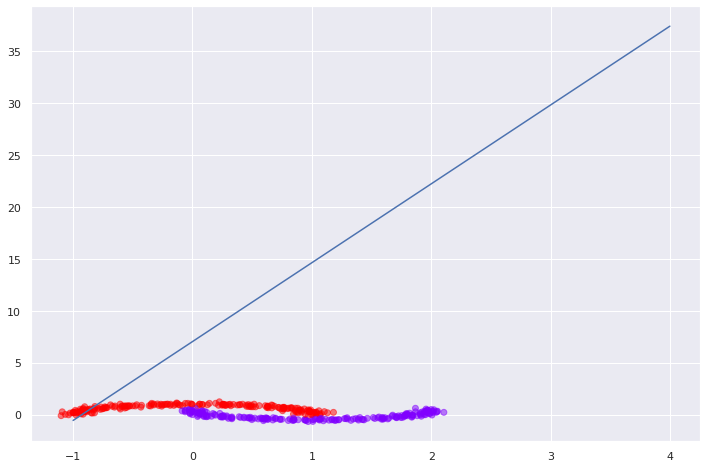

In [82]:
X, true_labels = make_moons(400, noise=0.075)
c = PerceptronWithAPocket()
pocket_W, pocket_accuracy, accuracy_v = c.fit(X, true_labels)
plt.figure(figsize=(12, 8))
predictions=c.predict(X)
colors = [0 if yi == 0 else 1 for yi in true_labels]
w0, w1, w2 = W[0][0], W[1][0], W[2][0]
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=colors, cmap='rainbow_r', alpha=0.5)
plt.plot([-1, 4], [separating_line_2d(-1, w0, w1, w2), separating_line_2d(4, w0, w1, w2)])